In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GaussianDropout
import tensorflow.keras.optimizers as optimizers
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [4]:
print(df_train.isna().sum().to_string())


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0


In [5]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
df_test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [7]:
df_train['datetime'] = pd.to_datetime(df_train['datetime'])

In [8]:
hour = df_train['datetime'].dt.hour
df_train['hour_sin'] = np.sin(2 * np.pi * hour / 24)
df_train['hour_cos'] = np.cos(2 * np.pi * hour / 24)
dayofweek = df_train['datetime'].dt.dayofweek
df_train['dayofweek_sin'] = np.sin(2 * np.pi * dayofweek / 7)
df_train['dayofweek_cos'] = np.cos(2 * np.pi * dayofweek / 7)
month = df_train['datetime'].dt.month
df_train['month_sin'] = np.sin(2 * np.pi * month / 12)
df_train['month_cos'] = np.cos(2 * np.pi * month / 12)
day = df_train['datetime'].dt.day
df_train['day_sin'] = np.sin(2 * np.pi * day / 31)
df_train['day_cos'] = np.cos(2 * np.pi * day / 31)

In [9]:
train = df_train[df_train['datetime'].dt.day <= 15]
X_train = train.drop(['count', 'datetime', 'casual', 'registered'], axis=1)
y_train = train['count']
test = df_train[df_train['datetime'].dt.day > 15]
X_test = test.drop(['count', 'datetime', 'casual', 'registered'], axis=1)
y_test = test['count']

MSE =  140.162248738598


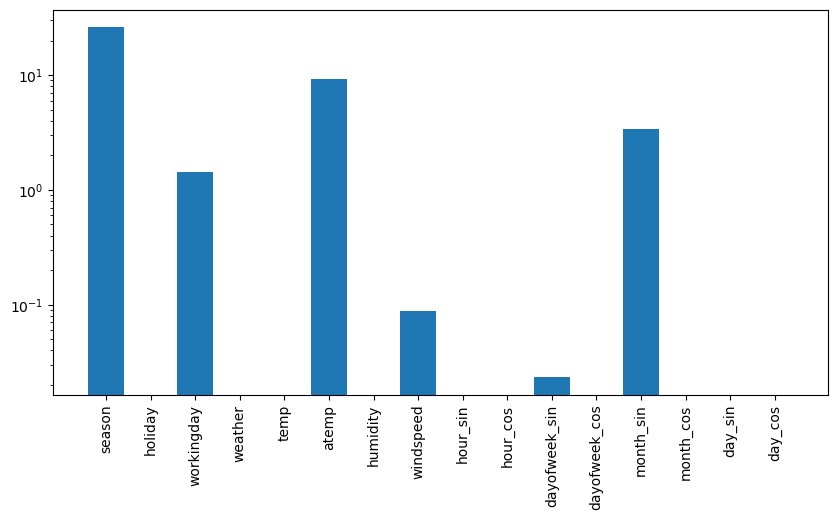

In [10]:
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("MSE = ",np.sqrt(mean_squared_error(y_test, y_pred)))
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(X_train.columns, clf.coef_)
plt.gca().set_yscale('log')
plt.xticks(rotation=90)
plt.show()

MSE =  83.48788789700613


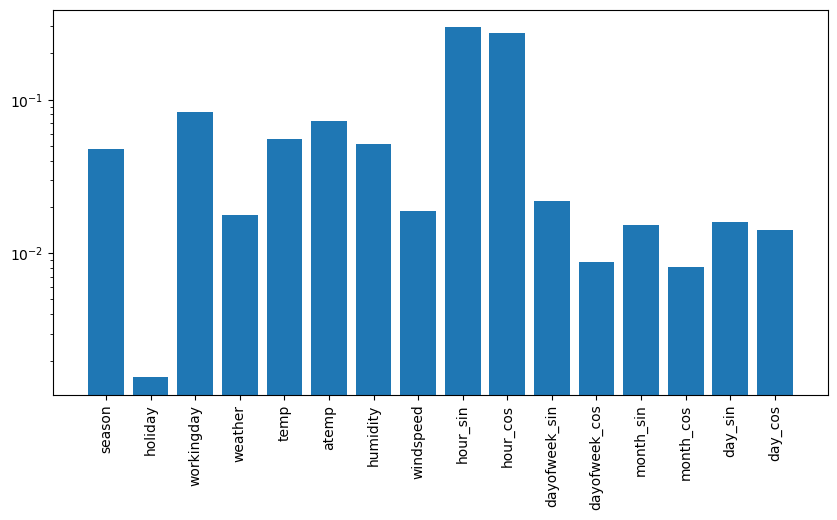

In [11]:
clf = RandomForestRegressor()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("MSE = ",np.sqrt(mean_squared_error(y_test, y_pred)))
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(X_train.columns, clf.feature_importances_)
plt.gca().set_yscale('log')
plt.xticks(rotation=90)
plt.show()


MSE =  79.8719916373554


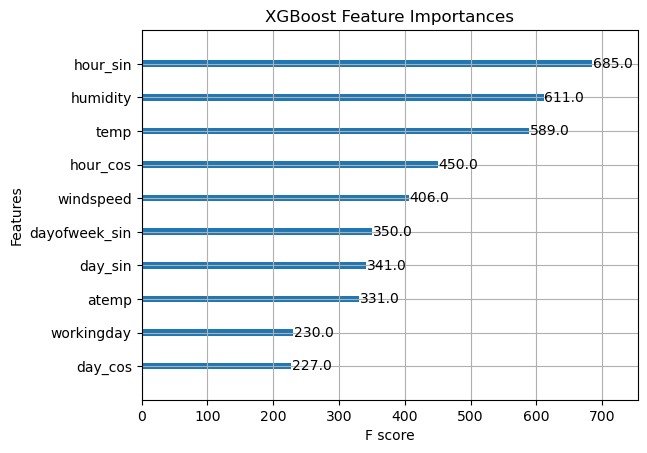

In [12]:
clf = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("MSE = ",np.sqrt(mean_squared_error(y_test, y_pred)))
xgb.plot_importance(clf, importance_type='weight', max_num_features=10, title='XGBoost Feature Importances')
plt.show()

In [13]:
df_test['datetime'] = pd.to_datetime(df_test['datetime'])
hour = df_test['datetime'].dt.hour
df_test['hour_sin'] = np.sin(2 * np.pi * hour / 24)
df_test['hour_cos'] = np.cos(2 * np.pi * hour / 24)
dayofweek = df_test['datetime'].dt.dayofweek
df_test['dayofweek_sin'] = np.sin(2 * np.pi * dayofweek / 7)
df_test['dayofweek_cos'] = np.cos(2 * np.pi * dayofweek / 7)
month = df_test['datetime'].dt.month
df_test['month_sin'] = np.sin(2 * np.pi * month / 12)
df_test['month_cos'] = np.cos(2 * np.pi * month / 12)
day = df_test['datetime'].dt.day
df_test['day_sin'] = np.sin(2 * np.pi * day / 31)
df_test['day_cos'] = np.cos(2 * np.pi * day / 31)

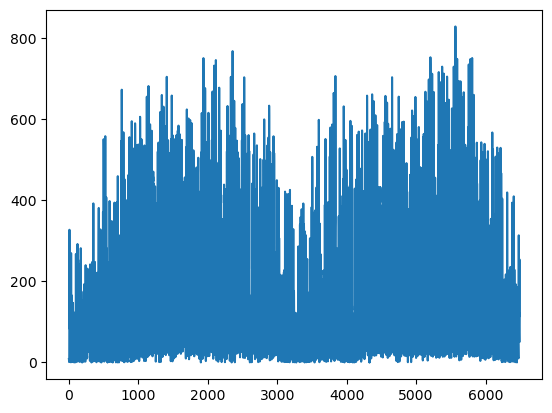

In [18]:
X_val = df_test.drop(['datetime'], axis=1)
y_val = np.abs(clf.predict(X_val))
plt.plot(y_val)

In [19]:
df_result = pd.DataFrame({'datetime': df_test['datetime'], 'count': y_val})
df_result.head()

,datetime,count
0,2011-01-20 00:00:00,8.600825
1,2011-01-20 01:00:00,7.465678
2,2011-01-20 02:00:00,3.018243
3,2011-01-20 03:00:00,1.141504
4,2011-01-20 04:00:00,1.757214


In [20]:
df_result.to_csv('result.csv', index=False)